# Yusuf AKIN - 171805020
# Semih AKIN - 171805009
# Mehmet VARAN - 181805009
# Mehmet Baturalp CAYLAK - 171805009

### libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import  accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

### Reading Data

In [26]:
drug = pd.concat([pd.read_table('UniqueDataSet\drugsComTrain_raw.tsv')
                  .drop(["Unnamed: 0","review","date"],axis = 1), pd.read_table('UniqueDataSet\drugsComTest_raw.tsv')
                  .drop(["Unnamed: 0","review","date"],axis = 1)])

# VERİ ÖN İŞLEME

#Nan veriler ile baş etme
imputer = SimpleImputer(missing_values = np.nan, strategy='constant')
drug_condition = drug.iloc[:,1:2] #bağımlı veriler
drug_condition = imputer.fit_transform(drug_condition) #bağımlı veriler


drug_name = drug.iloc[:,0:1]


Veri setinin şekli (215063, 4)
veri seti değişken tipleri: drugName        object
condition       object
rating         float64
usefulCount      int64
dtype: object
veri setinin ilk 10 satırı
                             drugName                     condition  rating  \
0                           Valsartan  Left Ventricular Dysfunction     9.0   
1                          Guanfacine                          ADHD     8.0   
2                              Lybrel                 Birth Control     5.0   
3                          Ortho Evra                 Birth Control     8.0   
4            Buprenorphine / naloxone             Opiate Dependence     9.0   
5                              Cialis  Benign Prostatic Hyperplasia     2.0   
6                      Levonorgestrel       Emergency Contraception     1.0   
7                        Aripiprazole               Bipolar Disorde    10.0   
8                              Keppra                      Epilepsy     1.0   
9  Ethinyl estradi

<AxesSubplot:>

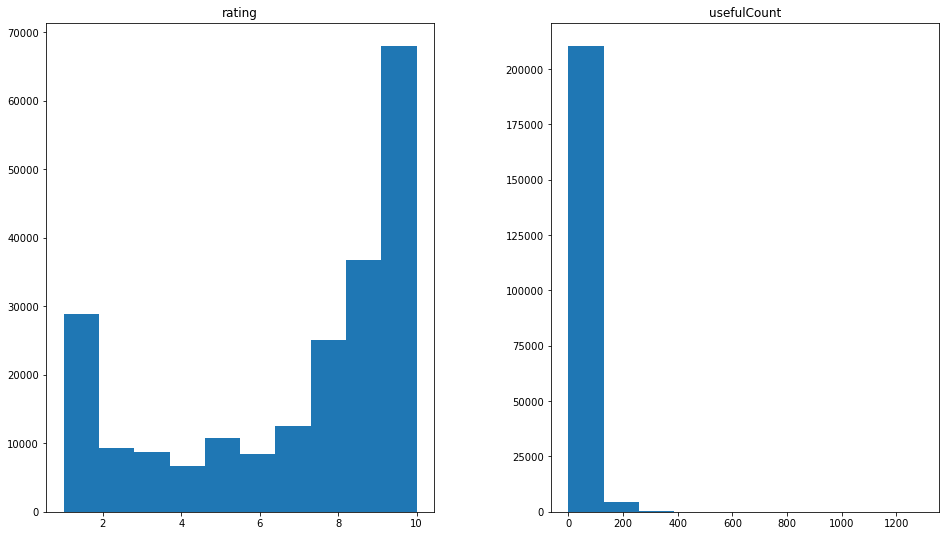

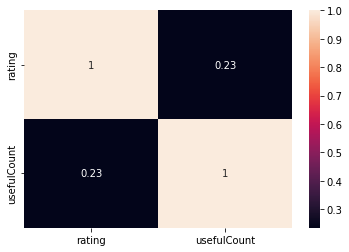

In [27]:
# veri setinin tanıtılması
print("Veri setinin şekli",drug.shape)
print("veri seti değişken tipleri:",drug.dtypes)
print("veri setinin ilk 10 satırı")
print(drug.head(10))
print("veri setinin istatistiki verileri")
description=drug.describe()
print(description)
# veri seti içindeki değişkenlerin dağılımlarının çizdirilmesi
drug.hist(bins=10,figsize=(16,9),grid=False);
corr = drug.corr(method='pearson')
plt.figure()
sns.heatmap(corr, annot=True)

### Preprocessing

In [ ]:
from sklearn import preprocessing

le= preprocessing.LabelEncoder()

drug_name['drugName'] = le.fit_transform(drug.iloc[:,0])
drug_others = pd.concat([drug_name, drug.iloc[:,2:4]], axis = 1)
drug_condition = le.fit_transform(drug_condition)


### Standart Scalar

In [ ]:
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(drug_others, drug_condition, test_size= 0.25, random_state=37)
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric = 'minkowski')
knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)

print('***KNN***')
print(f'Accuracy score = {accuracy_score(y_test,pred_knn)}')


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)

print('***DTC***')
print(f'Accuracy score = {accuracy_score(y_test,pred_dtc)}')



### RFC
### We can't use it cause there is to much data to compute so this method is not avaible for this

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc.fit(X_train, y_train)

pred_rfc = rfc.predict(X_test)
print('***RFC***')
print(f'Accuracy score = {accuracy_score(y_test,pred_rfc)}')


### Logistic Regression
### We can't use it cause there is to much data to compute so this method is not avaible for this

from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(X_train, y_train)
pred_logr = logr.predict(X_test)
print(f'Accuracy score = {accuracy_score(y_test,pred_logr)}')




### SVC
### We can't use it cause there are too much data to compute so this method is not avaible for this

from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

print('***SVC***')
pred_svc = svc.predict(X_test)
print(f'Accuracy score = {accuracy_score(y_test,pred_svc)}')